In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import tensorflow as tf
import bs4 as bs
import requests

import re
import os
import datetime
import random

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid', color_codes=True, font_scale=1.5, palette='plasma', font='Arial', rc={'figure.figsize':(8,6)})


In [2]:
os.getcwd()

'/home/adarshanand67/Documents/GitHub/Data-Science-Personal/Ken Jee/Salary Predictor'

In [3]:
df = pd.read_csv('salary_data.csv')
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hourly,employer_provided,min_salary,max_salary,avg_salary,Same state,Age of Company,python_yn,R_yn,spark_yn,aws_yn,excel_yn
0,Data Scientist,53-91,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,NM,NM,501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,72.0,1,47,1,0,0,0,1
1,Healthcare Data Scientist,63-112,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,MD,MD,10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112,87.5,1,36,1,0,0,0,0
2,Data Scientist,80-90,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,FL,FL,501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80,90,85.0,1,10,1,0,1,0,1
3,Data Scientist,56-97,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,WA,WA,1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,56,97,76.5,1,55,1,0,0,0,0
4,Data Scientist,86-143,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,NY,NY,51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,86,143,114.5,1,22,1,0,0,0,1


In [4]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'data analyst' in title.lower():
        return 'data analyst'
    elif 'machine learning' in title.lower():
        return 'machine learning'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'manager' in title.lower():
        return 'manager'

def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower()or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'junior' in title.lower() or 'associate' in title.lower() or 'developer' in title.lower():
        return 'junior'
    else:
        return 'na'

In [5]:
df['title_simplified'] = df['Job Title'].apply(title_simplifier)


In [6]:
df['job_seniority'] = df['Job Title'].apply(seniority)

In [7]:
df['title_simplified'].value_counts()

data scientist      279
data engineer       119
data analyst         99
manager              22
machine learning     22
analyst               3
Name: title_simplified, dtype: int64

In [8]:
df['job_seniority'].value_counts()

na        485
senior    220
junior     37
Name: job_seniority, dtype: int64

In [9]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hourly,employer_provided,min_salary,max_salary,avg_salary,Same state,Age of Company,python_yn,R_yn,spark_yn,aws_yn,excel_yn,title_simplified,job_seniority
0,Data Scientist,53-91,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,NM,NM,501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,72.0,1,47,1,0,0,0,1,data scientist,na
1,Healthcare Data Scientist,63-112,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,MD,MD,10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112,87.5,1,36,1,0,0,0,0,data scientist,na
2,Data Scientist,80-90,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,FL,FL,501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80,90,85.0,1,10,1,0,1,0,1,data scientist,na
3,Data Scientist,56-97,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,WA,WA,1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,56,97,76.5,1,55,1,0,0,0,0,data scientist,na
4,Data Scientist,86-143,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,NY,NY,51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,86,143,114.5,1,22,1,0,0,0,1,data scientist,na


In [10]:
df['desc_length'] = df['Job Description'].apply(lambda x: len(x))

In [11]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hourly,employer_provided,min_salary,max_salary,avg_salary,Same state,Age of Company,python_yn,R_yn,spark_yn,aws_yn,excel_yn,title_simplified,job_seniority,desc_length
0,Data Scientist,53-91,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,NM,NM,501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,72.0,1,47,1,0,0,0,1,data scientist,na,2536
1,Healthcare Data Scientist,63-112,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,MD,MD,10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112,87.5,1,36,1,0,0,0,0,data scientist,na,4783
2,Data Scientist,80-90,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,FL,FL,501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80,90,85.0,1,10,1,0,1,0,1,data scientist,na,3461
3,Data Scientist,56-97,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,WA,WA,1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,56,97,76.5,1,55,1,0,0,0,0,data scientist,na,3883
4,Data Scientist,86-143,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,NY,NY,51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,86,143,114.5,1,22,1,0,0,0,1,data scientist,na,2728


In [12]:
df['Competitors'].value_counts()

-1                                                                                              460
Novartis, Baxter, Pfizer                                                                         14
Oak Ridge National Laboratory, National Renewable Energy Lab, Los Alamos National Laboratory     12
Travelers, Allstate, State Farm                                                                  10
Roche, GlaxoSmithKline, Novartis                                                                  9
                                                                                               ... 
BrowserStack, Selenium Master, Perfecto Mobile                                                    1
Boeing, Northrop Grumman, Raytheon                                                                1
Unilever, Procter & Gamble, Henkel                                                                1
TASC, Vencore, Booz Allen Hamilton                                                                1


In [13]:
df['Competitors'].apply(lambda x: 0 if x==1 else x).apply(lambda x: x.split(',')).apply(lambda x: len(x))
df['Competitors']

0                                                     -1
1                                                     -1
2                                                     -1
3      Oak Ridge National Laboratory, National Renewa...
4                   Commerce Signals, Cardlytics, Yodlee
                             ...                        
737                           Pfizer, AstraZeneca, Merck
738                      See Tickets, TicketWeb, Vendini
739                                                   -1
740                                                   -1
741                                                   -1
Name: Competitors, Length: 742, dtype: object

In [14]:
pd.set_option('display.max_columns', None)

In [15]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hourly,employer_provided,min_salary,max_salary,avg_salary,Same state,Age of Company,python_yn,R_yn,spark_yn,aws_yn,excel_yn,title_simplified,job_seniority,desc_length
0,Data Scientist,53-91,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,NM,NM,501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,72.0,1,47,1,0,0,0,1,data scientist,na,2536
1,Healthcare Data Scientist,63-112,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,MD,MD,10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112,87.5,1,36,1,0,0,0,0,data scientist,na,4783
2,Data Scientist,80-90,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,FL,FL,501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80,90,85.0,1,10,1,0,1,0,1,data scientist,na,3461
3,Data Scientist,56-97,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,WA,WA,1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,56,97,76.5,1,55,1,0,0,0,0,data scientist,na,3883
4,Data Scientist,86-143,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,NY,NY,51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,86,143,114.5,1,22,1,0,0,0,1,data scientist,na,2728


In [16]:
# min_salary wage to annual salary
df['min_salary'] = df.apply(lambda x:x.min_salary*2 if x.hourly==1 else x.min_salary, axis=1)
df['max_salary'] = df.apply(lambda x:x.max_salary*2 if x.hourly==1 else x.max_salary, axis=1)

# Starting EDA

In [17]:
df.describe()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,Same state,Age of Company,python_yn,R_yn,spark_yn,aws_yn,excel_yn,desc_length
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.0,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,100.626011,1.0,46.591644,0.528302,0.002695,0.225067,0.237197,0.522911,3869.545822
std,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,38.855948,0.0,53.778815,0.499535,0.051882,0.417908,0.425651,0.499812,1521.495868
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,1.0,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,1.0,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2801.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.0,24.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3731.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.0,59.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4740.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.0,276.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000


In [18]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'Same state', 'Age of Company', 'python_yn', 'R_yn', 'spark_yn',
       'aws_yn', 'excel_yn', 'title_simplified', 'job_seniority',
       'desc_length'],
      dtype='object')

<AxesSubplot:>

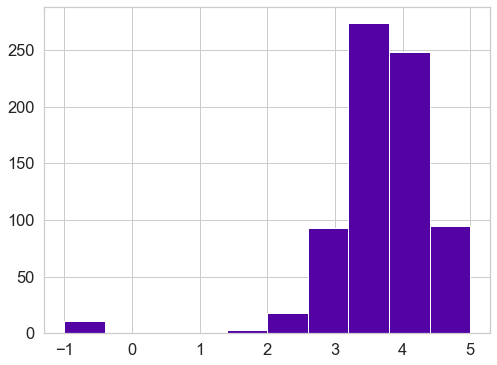

In [19]:
df.Rating.hist()

<AxesSubplot:>

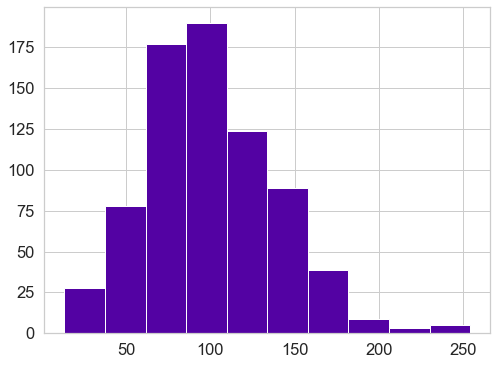

In [20]:
df.avg_salary.hist()

<AxesSubplot:>

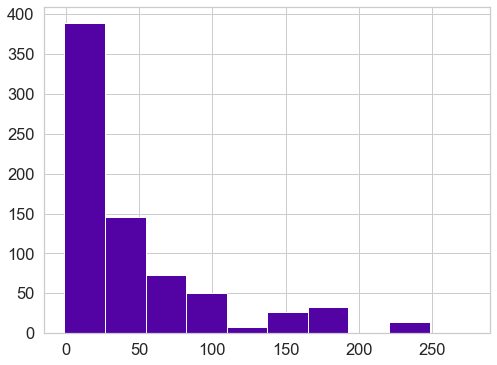

In [21]:
df["Age of Company"].hist()

<AxesSubplot:>

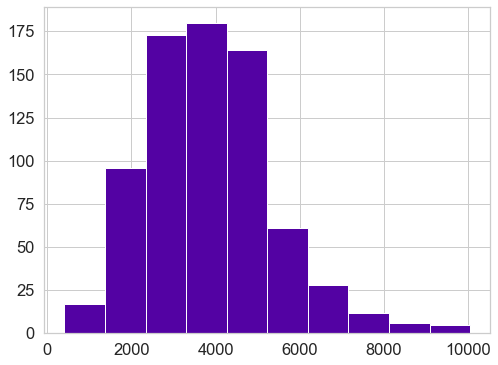

In [22]:
df.desc_length.hist()

<AxesSubplot:xlabel='avg_salary'>

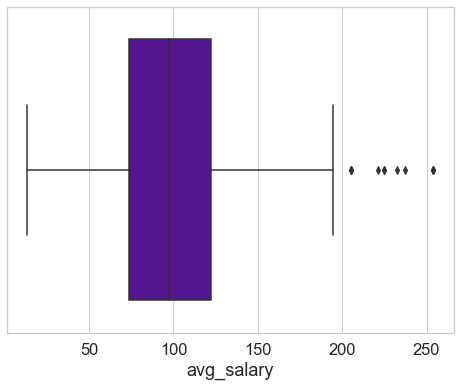

In [23]:
sns.boxplot(df.avg_salary)


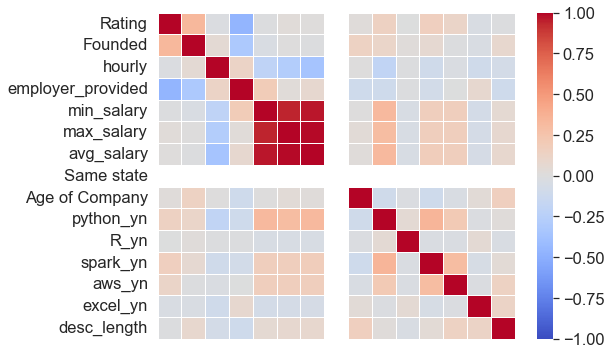

In [24]:
# colorbar length -1 to 1
sns.heatmap(df.corr(),linewidths=0.5,vmin=-1,vmax=1,cmap='coolwarm')
plt.xticks([]);

In [25]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'Same state', 'Age of Company', 'python_yn', 'R_yn', 'spark_yn',
       'aws_yn', 'excel_yn', 'title_simplified', 'job_seniority',
       'desc_length'],
      dtype='object')

In [26]:
categorical_cols = ['Job Title', 'Company Name', 'Location', 'Headquarters','Type of ownership', 'Industry', 'Sector','title_simplified', 'job_seniority']
df[categorical_cols]

,Job Title,Company Name,Location,Headquarters,Type of ownership,Industry,Sector,title_simplified,job_seniority
0,Data Scientist,Tecolote Research,NM,NM,Company - Private,Aerospace & Defense,Aerospace & Defense,data scientist,na
1,Healthcare Data Scientist,University of Maryland Medical System,MD,MD,Other Organization,Health Care Services & Hospitals,Health Care,data scientist,na
2,Data Scientist,KnowBe4,FL,FL,Company - Private,Security Services,Business Services,data scientist,na
3,Data Scientist,PNNL,WA,WA,Government,Energy,"Oil, Gas, Energy & Utilities",data scientist,na
4,Data Scientist,Affinity Solutions,NY,NY,Company - Private,Advertising & Marketing,Business Services,data scientist,na
...,...,...,...,...,...,...,...,...,...
737,"Sr Scientist, Immuno-Oncology - Oncology",GSK,MA,MA,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,None,senior
738,Senior Data Engineer,Eventbrite,TN,TN,Company - Public,Internet,Information Technology,data engineer,senior
739,"Project Scientist - Auton Lab, Robotics Institute",Software Engineering Institute,PA,PA,College / University,Colleges & Universities,Education,None,na
740,Data Science Manager,"Numeric, LLC",PA,PA,Company - Private,Staffing & Outsourcing,Business Services,manager,na


In [27]:
list(enumerate(categorical_cols))

[(0, 'Job Title'),
 (1, 'Company Name'),
 (2, 'Location'),
 (3, 'Headquarters'),
 (4, 'Type of ownership'),
 (5, 'Industry'),
 (6, 'Sector'),
 (7, 'title_simplified'),
 (8, 'job_seniority')]

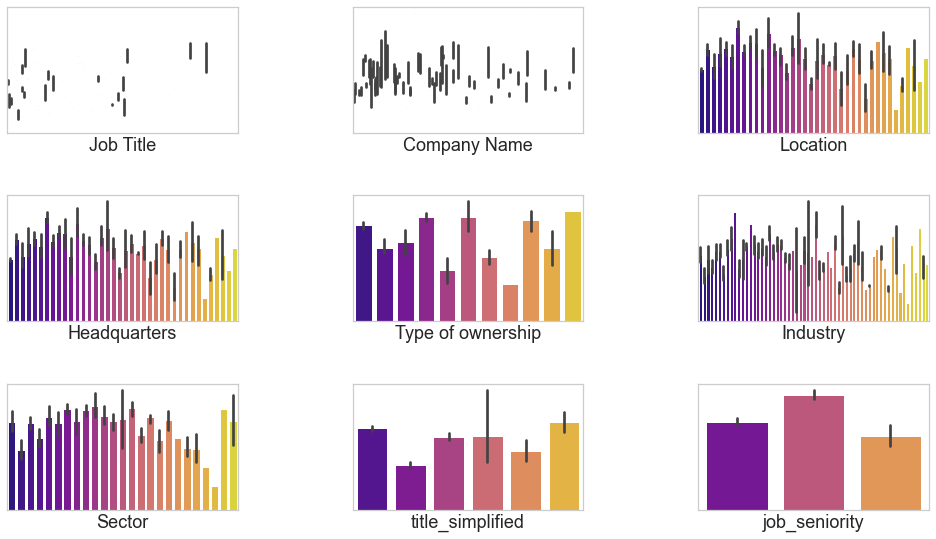

In [28]:
plt.figure(figsize=(12,8))

for col in enumerate(categorical_cols):
    plt.subplot(4,3,col[0]+1)
    sns.barplot(x=col[1],y='avg_salary',data=df,palette='plasma')
    plt.xticks(rotation=90)
    plt.xticks([])
    plt.yticks([])
    plt.ylabel('')
    # space
    plt.subplots_adjust(wspace=0.5,hspace=0.5)
    # figsize
    plt.subplots_adjust(top=0.9,bottom=0.1,left=0.1,right=0.9)
    # increase chart size
    plt.gcf().set_size_inches(16, 12)


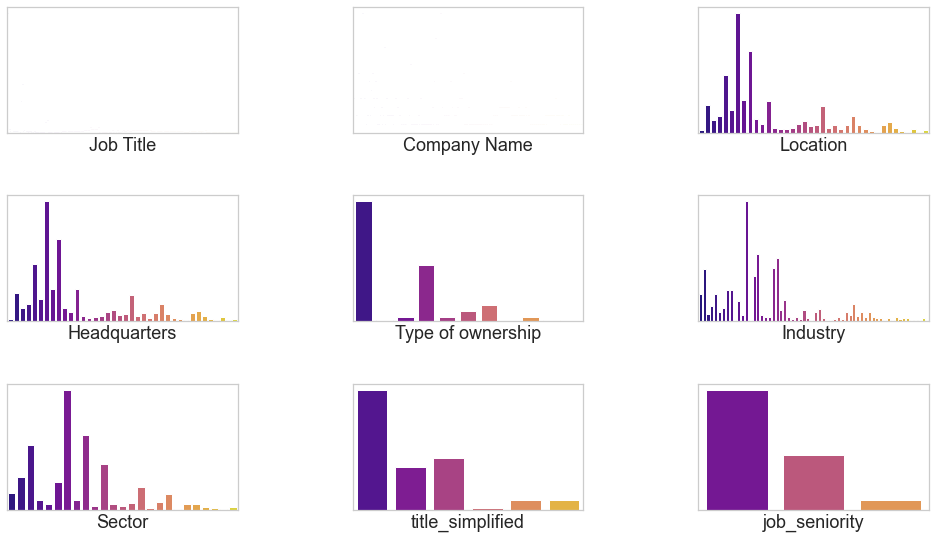

In [29]:
plt.figure(figsize=(12,8))

for col in enumerate(categorical_cols):
    plt.subplot(4,3,col[0]+1)
    sns.countplot(x=col[1],data=df,palette='plasma')
    plt.xticks(rotation=90)
    plt.xticks([])
    plt.yticks([])
    plt.ylabel('')
    # space

    plt.subplots_adjust(wspace=0.5,hspace=0.5)
    # figsize
    plt.subplots_adjust(top=0.9,bottom=0.1,left=0.1,right=0.9)
    plt.gcf().set_size_inches(16, 12)


In [30]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'Same state', 'Age of Company', 'python_yn', 'R_yn', 'spark_yn',
       'aws_yn', 'excel_yn', 'title_simplified', 'job_seniority',
       'desc_length'],
      dtype='object')

In [31]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hourly,employer_provided,min_salary,max_salary,avg_salary,Same state,Age of Company,python_yn,R_yn,spark_yn,aws_yn,excel_yn,title_simplified,job_seniority,desc_length
0,Data Scientist,53-91,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,NM,NM,501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,72.0,1,47,1,0,0,0,1,data scientist,na,2536
1,Healthcare Data Scientist,63-112,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,MD,MD,10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112,87.5,1,36,1,0,0,0,0,data scientist,na,4783
2,Data Scientist,80-90,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,FL,FL,501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80,90,85.0,1,10,1,0,1,0,1,data scientist,na,3461
3,Data Scientist,56-97,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,WA,WA,1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,56,97,76.5,1,55,1,0,0,0,0,data scientist,na,3883
4,Data Scientist,86-143,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,NY,NY,51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,86,143,114.5,1,22,1,0,0,0,1,data scientist,na,2728


In [32]:
pd.pivot_table(df,index=['title_simplified','job_seniority'],values=['avg_salary'],aggfunc=np.mean).sort_values(by='avg_salary',ascending=False)

,,avg_salary
title_simplified,job_seniority,
analyst,senior,173.000000
machine learning,senior,142.071429
data scientist,senior,138.956522
data engineer,senior,124.689189
machine learning,na,119.133333
data engineer,junior,118.900000
data scientist,na,107.560773
data engineer,na,95.259740
data scientist,junior,91.333333


In [33]:
# State wise salary pivot table
pd.pivot_table(df,index=['Location'],values=['avg_salary'],aggfunc=np.mean).sort_values(by='avg_salary',ascending=False)

,avg_salary
Location,
CA,123.619205
IL,116.662500
DC,110.181818
Los Angeles,107.500000
MA,106.281553
NJ,104.558824
MI,100.250000
RI,100.000000
NY,98.652778


# Good practice to make wordcloud at the end

In [34]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [35]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hourly,employer_provided,min_salary,max_salary,avg_salary,Same state,Age of Company,python_yn,R_yn,spark_yn,aws_yn,excel_yn,title_simplified,job_seniority,desc_length
0,Data Scientist,53-91,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,NM,NM,501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,72.0,1,47,1,0,0,0,1,data scientist,na,2536
1,Healthcare Data Scientist,63-112,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,MD,MD,10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112,87.5,1,36,1,0,0,0,0,data scientist,na,4783
2,Data Scientist,80-90,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,FL,FL,501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80,90,85.0,1,10,1,0,1,0,1,data scientist,na,3461
3,Data Scientist,56-97,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,WA,WA,1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,56,97,76.5,1,55,1,0,0,0,0,data scientist,na,3883
4,Data Scientist,86-143,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,NY,NY,51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,86,143,114.5,1,22,1,0,0,0,1,data scientist,na,2728


In [36]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'Same state', 'Age of Company', 'python_yn', 'R_yn', 'spark_yn',
       'aws_yn', 'excel_yn', 'title_simplified', 'job_seniority',
       'desc_length'],
      dtype='object')

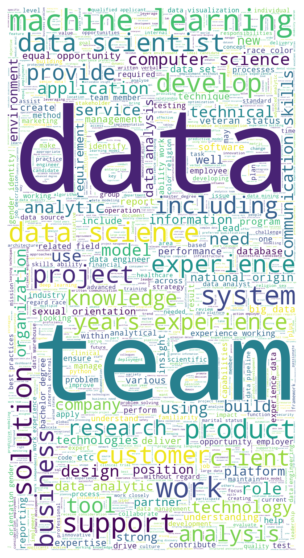

In [37]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()

In [39]:
df.to_csv('salary_data.csv')